In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import feature_extraction

In [80]:
df = pd.read_csv('./Dataset/Language Detection.csv')

In [81]:
# Preprocessing
punctuation_list = string.punctuation

def preprocess_text(text, lang="english"):
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]
    
    # Remove numbers
    words = [word for word in words if word.isalpha()]
    
    # Join words back to text
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [82]:
print(df['Text'].head(10))

df['Text'] = df['Text'].apply(preprocess_text)

print(df['Text'].head(10))

0     Nature, in the broadest sense, is the natural...
1    "Nature" can refer to the phenomena of the phy...
2    The study of nature is a large, if not the onl...
3    Although humans are part of nature, human acti...
4    [1] The word nature is borrowed from the Old F...
5    [2] In ancient philosophy, natura is mostly us...
6    [3][4] \nThe concept of nature as a whole, the...
7    During the advent of modern scientific method ...
8    [5][6] With the Industrial revolution, nature ...
9    However, a vitalist vision of nature, closer t...
Name: Text, dtype: object
0    Nature in the broadest sense is the natural ph...
1    Nature can refer to the phenomena of the physi...
2    The study of nature is a large if not the only...
3    Although humans are part of nature human activ...
4    The word nature is borrowed from the Old Frenc...
5    In ancient philosophy natura is mostly used as...
6    The concept of nature as a whole the physical ...
7    During the advent of modern scient

In [83]:
text = df['Text']
language = df['Language']
x_train, x_test, y_train, y_test = train_test_split(text, language, test_size=0.2, random_state=42)

In [84]:
tfidf = feature_extraction.text.TfidfVectorizer(ngram_range=(2, 3), analyzer='char')

In [85]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'NaiveBayes': MultinomialNB(),
    'SVM': SVC()
}

results = {}

In [86]:
for model_name, model in models.items():
    pipe = Pipeline([('tfidf', tfidf), ('clf', model)])

    param_grid = {
        'tfidf__ngram_range': [(1, 2), (2, 3)],
        'tfidf__max_features': [5000, 10000, None]
    }
    
    if model_name == 'LogisticRegression' or model_name == 'SVM':
        param_grid['clf__C'] = [0.1, 1, 10]
    
    grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    y_pred = grid_search.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = {'Best Params': grid_search.best_params_, 'Accuracy': accuracy, 'F1 Score': f1}

    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))



LogisticRegression Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       106
      Danish       0.95      0.97      0.96        73
       Dutch       0.96      0.95      0.96       111
     English       0.96      0.99      0.97       291
      French       0.98      0.97      0.97       219
      German       1.00      0.96      0.98        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      0.80      0.89        10
     Italian       0.97      0.96      0.97       145
     Kannada       0.94      0.24      0.39        66
   Malayalam       0.46      0.95      0.62       121
  Portugeese       0.95      0.97      0.96       144
     Russian       1.00      1.00      1.00       136
     Spanish       0.99      0.96      0.97       160
    Sweedish       0.96      0.97      0.97       133
       Tamil       0.89      0.09      0.17        87
     Turkish       0.99      0.98    

c:\Users\corne\anaconda3\envs\Natural_Language_Processing\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\corne\anaconda3\envs\Natural_Language_Processing\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\corne\anaconda3\envs\Natural_Language_Processing\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf


NaiveBayes Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       1.00      0.86      0.93        73
       Dutch       0.99      0.96      0.98       111
     English       0.50      1.00      0.67       291
      French       0.98      0.97      0.97       219
      German       0.98      0.97      0.97        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      0.50      0.67        10
     Italian       0.99      0.97      0.98       145
     Kannada       0.00      0.00      0.00        66
   Malayalam       0.67      0.03      0.06       121
  Portugeese       0.96      0.98      0.97       144
     Russian       1.00      1.00      1.00       136
     Spanish       0.99      0.99      0.99       160
    Sweedish       0.94      0.98      0.96       133
       Tamil       0.00      0.00      0.00        87
     Turkish       0.99      0.97      0.98  

In [87]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:\n", results_df)


Model Performance Summary:
                                                           Best Params  \
LogisticRegression  {'clf__C': 10, 'tfidf__max_features': 5000, 't...   
NaiveBayes          {'tfidf__max_features': 5000, 'tfidf__ngram_ra...   
SVM                 {'clf__C': 10, 'tfidf__max_features': 5000, 't...   

                    Accuracy  F1 Score  
LogisticRegression  0.911509  0.900482  
NaiveBayes          0.848162   0.80737  
SVM                 0.912959  0.901298  


C:\Users\corne\AppData\Local\Temp\ipykernel_19372\973405799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')


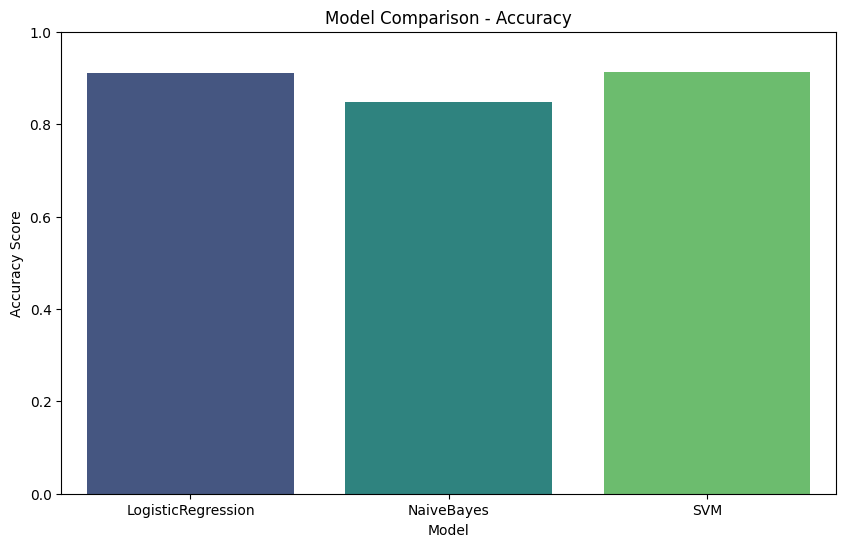

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='viridis')
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.show()

In [89]:
best_model = LogisticRegression(C=results['LogisticRegression']['Best Params']['clf__C'], max_iter=1000)
best_pipe = Pipeline([('tfidf', tfidf), ('clf', best_model)])
best_pipe.fit(x_train, y_train)
y_pred_best = best_pipe.predict(x_test)

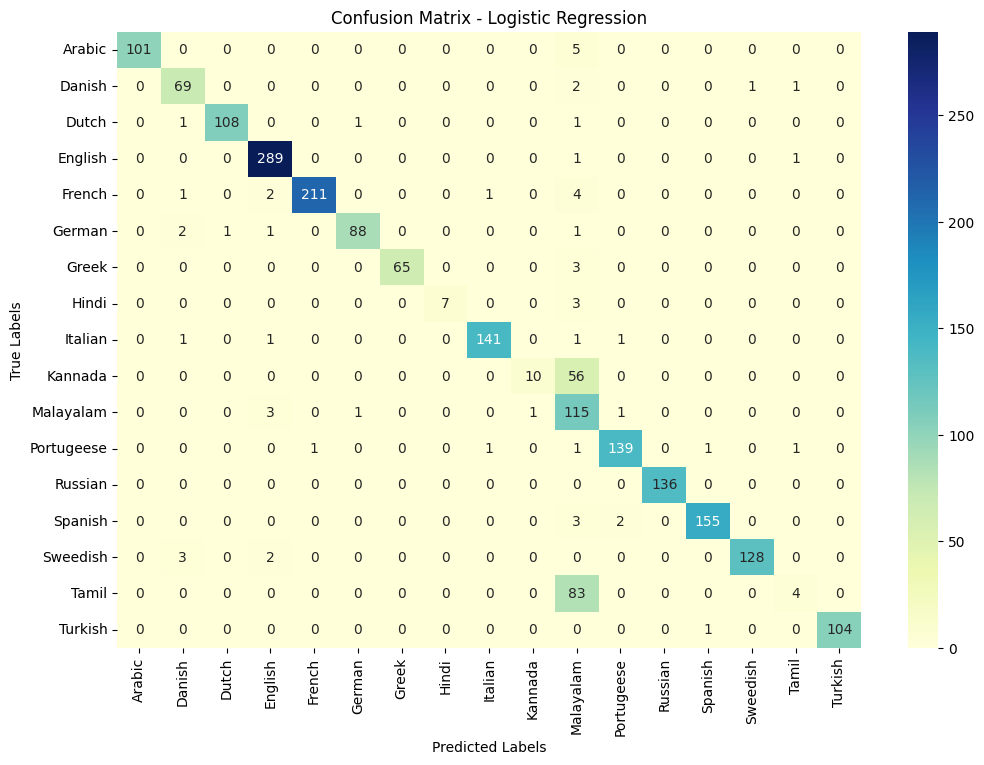

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=sorted(df['Language'].unique()), yticklabels=sorted(df['Language'].unique()))
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [91]:
model_pipe = Pipeline([('tfidf', tfidf), ('clf', LogisticRegression(max_iter=1000))])

In [92]:
model_pipe.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 3))),
                ('clf', LogisticRegression(max_iter=1000))])

In [94]:
def predict_language(text):
    prediction = model_pipe.predict([text])[0]
    return prediction

text_input = input("Enter a text to detect its language: ")
predicted_language = predict_language(text_input)

print(f"The predicted language is: {predicted_language}")

The predicted language is: English
